In [ ]:
######################################

In [ ]:
######################################

In [ ]:
######################################

Programın çalışması için gerekli olan kütüphaneler tanımlanıyor.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg
import cv2
import extcolors
from PIL import Image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from colormap import rgb2hex

Renk analizi yapılacak fotoğrafın dosyadan okunup gösterilmesi sağlanıyor.

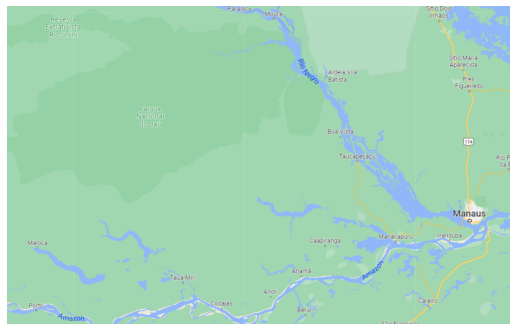

In [3]:
plt.figure(figsize=(9, 9)) #Width, height in inches.

img_url = r"D:\gradproject\input\3.png" 
img = plt.imread(img_url)

plt.imshow(img)
plt.axis('off')
plt.show()

Sisteme okutulan fotoğrafın 'RGB' ve 'Occurence' değerleri extcolors kütüphanesinin yardımıyla ayrıştırılıyor. 

In [4]:
colors_x = extcolors.extract_from_path(img_url, tolerance = 12, limit = 12)
colors_x

([((161, 215, 176), 456403),
  ((144, 184, 248), 29557),
  ((157, 208, 192), 4746),
  ((148, 191, 231), 3935),
  ((137, 146, 141), 3160),
  ((202, 217, 207), 2752),
  ((255, 255, 255), 1985),
  ((152, 199, 213), 1791),
  ((244, 236, 216), 1669),
  ((255, 210, 105), 959),
  ((217, 199, 99), 681),
  ((202, 214, 229), 678)],
 512100)

Bu bölümde 'extcolors' tarafından ayrıştırılan değerler birbirinden ayrılır.(RGB ve occurence değerleri) 'RGB' renk kodları 'HEX' koda dönüştürülür. 'HEX' renk kodları ve 'occurence' değerleri Pandas dataframe tablosuna yazdırılır.

In [5]:
def color_to_df(input):
    #split metodu listeyi belirtilen ayıracı kullanarak yeniden döndürür.
    colors_pre_list = str(input).replace('([(','').split(', (')[0:-1]
    df_rgb = [i.split('), ')[0] + ')' for i in colors_pre_list]
    df_percent = [i.split('), ')[1].replace(')','') for i in colors_pre_list]
    
    #RGB to HEX code
    df_color_up = [rgb2hex(int(i.split(", ")[0].replace("(","")),
                          int(i.split(", ")[1]),
                          int(i.split(", ")[2].replace(")",""))) for i in df_rgb]
    
    df = pd.DataFrame(zip(df_color_up, df_percent), columns = ['c_code','occurence'])
    return df

df_color = color_to_df(colors_x)
df_color

,c_code,occurence
0,#A1D7B0,456403
1,#90B8F8,29557
2,#9DD0C0,4746
3,#94BFE7,3935
4,#89928D,3160
5,#CAD9CF,2752
6,#FFFFFF,1985
7,#98C7D5,1791
8,#F4ECD8,1669
9,#FFD269,959


Bu bölümde occurence değerleri yardımıyla, fotoğraf üzerinde bulunan renklerin yüzdeleri hesaplanıyor. 
Örnek ((renk occurence değeri * 100 / toplam occurence değeri)) = Renk yüzdesi

In [6]:
list_color = list(df_color['c_code'])
list_precent = [int(i) for i in list(df_color['occurence'])]
def colorandpercentage_to_df(input):
    pp = [str(round(p*100/sum(list_precent),1)) for c, p in zip(list_color,list_precent)]
    
    #split metodu listeyi belirtilen ayıracı kullanarak yeniden döndürür.
    colors_pre_list = str(input).replace('([(','').split(', (')[0:-1]
    df_rgb = [i.split('), ')[0] + ')' for i in colors_pre_list]
    df_percent = [i.split('), ')[1].replace(')','') for i in colors_pre_list]
    
    #RGB to HEX code
    df_color_up = [rgb2hex(int(i.split(", ")[0].replace("(","")),
                          int(i.split(", ")[1]),
                          int(i.split(", ")[2].replace(")",""))) for i in df_rgb]
    
    df = pd.DataFrame(zip(df_color_up, df_percent, pp), columns = ['c_code','occurence','percentage'])
    return df

df_color = colorandpercentage_to_df(colors_x)
df_color

,c_code,occurence,percentage
0,#A1D7B0,456403,89.9
1,#90B8F8,29557,5.8
2,#9DD0C0,4746,0.9
3,#94BFE7,3935,0.8
4,#89928D,3160,0.6
5,#CAD9CF,2752,0.5
6,#FFFFFF,1985,0.4
7,#98C7D5,1791,0.4
8,#F4ECD8,1669,0.3
9,#FFD269,959,0.2


Renklerin HEX kodlarıyla beraber yüzdelikleri bir pasta grafiğinde gösterilir.

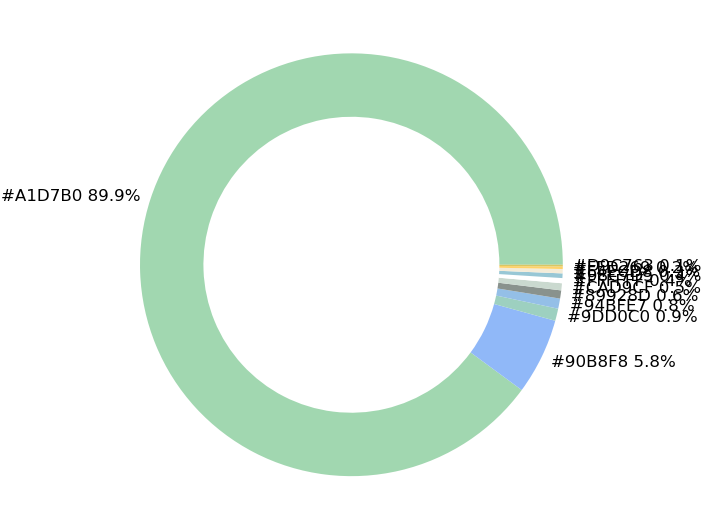

In [7]:

text_c = [c + ' ' + str(round(p*100/sum(list_precent),1)) +'%' for c, p in zip(list_color,
                                                                               list_precent)]

fig, ax = plt.subplots(figsize=(70,70),dpi=10)
wedges, text = ax.pie(list_precent,
                      labels= text_c,
                      labeldistance= 1.05,
                      colors = list_color,
                      textprops={'fontsize': 120, 'color':'black'}
                     )

#create space in the center
plt.setp(wedges, width=0.3)

ax.set_aspect("equal")
fig.set_facecolor('white')
plt.show()

Bu bölümde son olarak '.loc' yardımıyla filtreleme işlemi gerçekleştirildi. Eğer yeşil renk yüzdesi %70 üzerindeyse yakınlarda orman olduğu anlaşılıyor.

In [9]:
df_color.loc[((df_color['c_code']=='#A1D7B0') | (df_color['c_code']=='#458B74')| (df_color['c_code']=='#458B00') \
              | (df_color['c_code']=='#3D9140')| (df_color['c_code']=='#6E8B3D')| (df_color['c_code']=='#228B22')\
              | (df_color['c_code']=='#008000')| (df_color['c_code']=='#008B00')| (df_color['c_code']=='#00CD00')) \
              & (df_color['percentage'].astype(float) >= 70.0), 'Status']= 'Yakınlarda orman var'
print(df_color)
#& (df_color['percentage'] >= 90)

     c_code occurence percentage                Status
0   #A1D7B0    456403       89.9  Yakınlarda orman var
1   #90B8F8     29557        5.8                   NaN
2   #9DD0C0      4746        0.9                   NaN
3   #94BFE7      3935        0.8                   NaN
4   #89928D      3160        0.6                   NaN
5   #CAD9CF      2752        0.5                   NaN
6   #FFFFFF      1985        0.4                   NaN
7   #98C7D5      1791        0.4                   NaN
8   #F4ECD8      1669        0.3                   NaN
9   #FFD269       959        0.2                   NaN
10  #D9C763       681        0.1                   NaN
